In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
#import matplotlib
from matplotlib import pyplot as plt
#import scipy.stats as stats

<h2>Exploratory Data Analysis</h2>
Now that the data is cleaned up, take a deeper look at it.

In [2]:
df = pd.read_csv("wrangled_auto.csv")

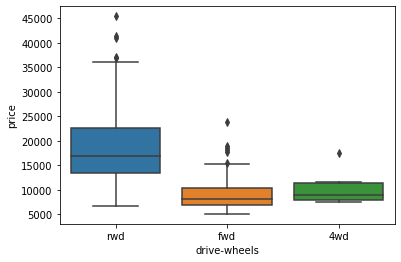

In [3]:
#Box plots
#Distribution of categories in relation of another value
sns.boxplot(x="drive-wheels",y="price",data=df)

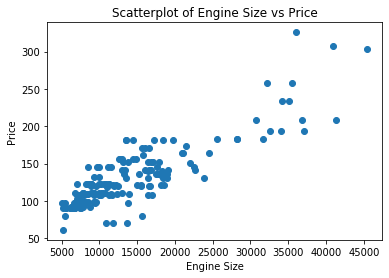

In [4]:
#Scatterplot
#How do two continuous values relate to each other?
y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [5]:
#group by
df_subset_for_grouping = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_subset_for_grouping.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [6]:
#pivot the results of the group by to group by a different column
df_pivot = df_grp.pivot(index = 'drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

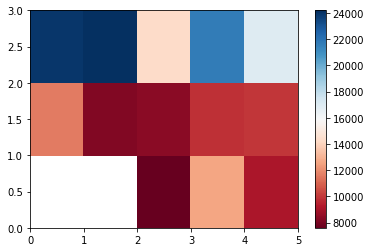

In [7]:
#heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<h2>Analysis of Variance (ANOVA)</h2>

In [8]:
#Make a function to abstract a conclusion
def interpret_anova(f,p):
    #When F < 1 and p > 0.05 then it means the variance between the group is not significantly different.
    #The average means of the two groups are similar,
    #and whatever difference there is is probably due to variance within each group more than differences.
    significant_difference = True
    if f < 1:
        if p > 0.05:
            significant_difference = False
    if significant_difference:
        print("Significant difference")
    else:
        print("The difference is not significant")
    return

In [9]:
#Make a function to analyze anova
def anova (make1, make2):
    df_anova=df[["make", "price"]]
    grouped_anova=df_anova.groupby(["make"])
    f,p = stats.f_oneway(grouped_anova.get_group(make1)["price"], grouped_anova.get_group(make2)["price"])
    print("-----")
    print(make1, make2)
    print("-----")
    print("")
    print("F =")
    print(f)
    print("F = Variation between sample group means / variation within sample group")
    print("")
    print("P =")
    print(p)
    print("Confidence degree.  Gets higher the more F is due to the groups actuall being different than each other.")
    print("")
    interpret_anova(f,p)
    return

In [10]:
anova("honda","subaru")

NameError: name 'stats' is not defined

In [ ]:
anova("honda","jaguar")

<h2>Correlation</h2>

In [ ]:
#define a correlation function.
def correlate(attribute1, attribute2):
    sns.regplot(x=attribute1, y=attribute2, data=df) #regplot = Scatterplot with Regression line
    plt.ylim(0,)
    plt.title(attribute1 + " vs " + attribute2)
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.show()

In [ ]:
#examine correlation between engine size and price.
#Positive linear relationship.
#A steep line indicates a good correlation.
#If positive direction, they have a positive correlation.  The one tends to increase the other.
correlate("engine-size", "price")

In [ ]:
#examine correlation between Highway MPG and Price.
#Negative linear relationship.
#A steep line, even in the negative direction, indicates a good correlation.
#If negative direction, they have a negative correlation.  The one tends to decrease the other.
correlate("highway-mpg", "price")

In [ ]:
#examine correlation between peak-rm and price.
#Non-linear relationship.
#A shallow sloped line, indicates a weak correlation.
correlate("peak-rpm", "price")

<h3>Pearson Correlation</h3>
<br/>
Yields:
<ul>
<li>Correlation coefficient</li>
<li>P-value</li>
</ul>

In [ ]:
#Correlation coefficient gets closer to +1 when there is a large positive relationship.
#It gets closer to -1 when there is a large negative relationship.
#Zero means no relationship.

#P-value < 0.001 Strong certainty
#P < 0.05 Moderate certainty
#P < 0.1 Weak certainty
#P > 0.1 No certainty.

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(pearson_coef, p_value)

In [ ]:
#heat map of correlation
fig, ax = pyplot.subplots()
AllForHeat = df.corr()
im = ax.pcolor(AllForHeat, cmap='RdBu_r') #Reverse the red/blue colormap

#label names
row_labels = df.columns
col_labels = df.columns

#move ticks and labels to the center.
ax.set_xticks(np.arange(AllForHeat.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(AllForHeat.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

ax.set_title("heat map of correlation")

#rotate label if too long
plt.xticks(rotation=90)
plt.colorbar(im)
plt.show()

A fast but less visual way to get correlations.

In [11]:
print(df[["peak-rpm","highway-mpg","price"]].corr())

             peak-rpm  highway-mpg     price
peak-rpm     1.000000    -0.058598 -0.101616
highway-mpg -0.058598     1.000000 -0.704692
price       -0.101616    -0.704692  1.000000
